In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
from PIL import Image
import matplotlib.pyplot as plt


base_path = 'data/the-vertebrae-xray-images/xkt857dsxk-1/331/331'

In [5]:
classes = ['Normal', 'Scol', 'Spond']
image_counts = {}

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

In [7]:
df_counts

,Class,ImageCount
0,Normal,71
1,Scol,185
2,Spond,78


In [9]:
import seaborn as sns

C:\Users\ashis\AppData\Local\Temp\ipykernel_9276\3624165005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")


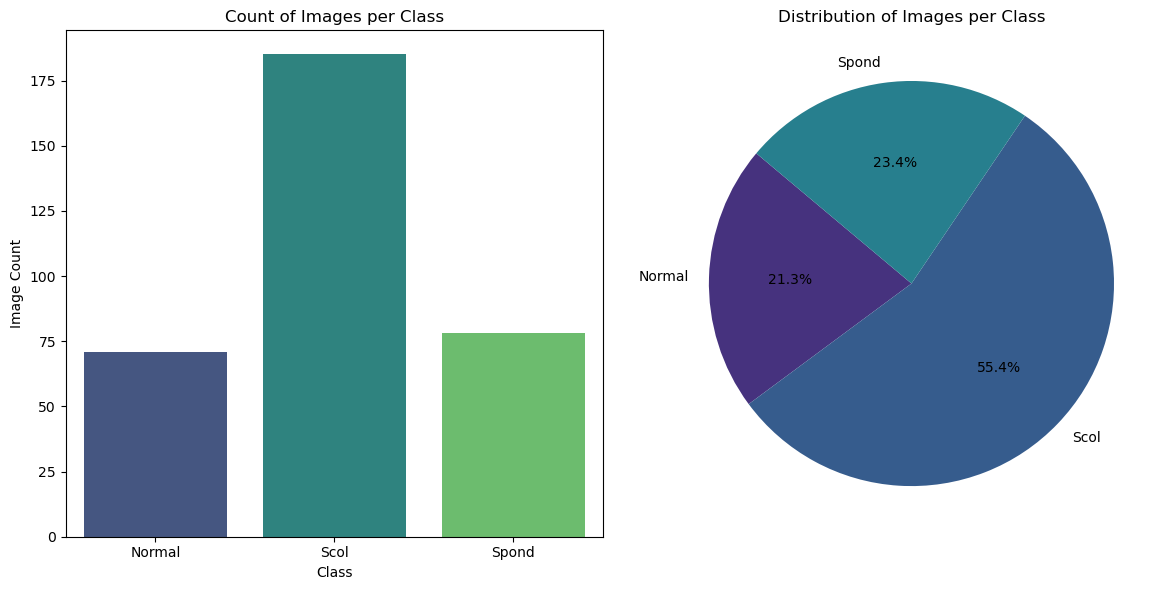

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

plt.tight_layout()
plt.show()

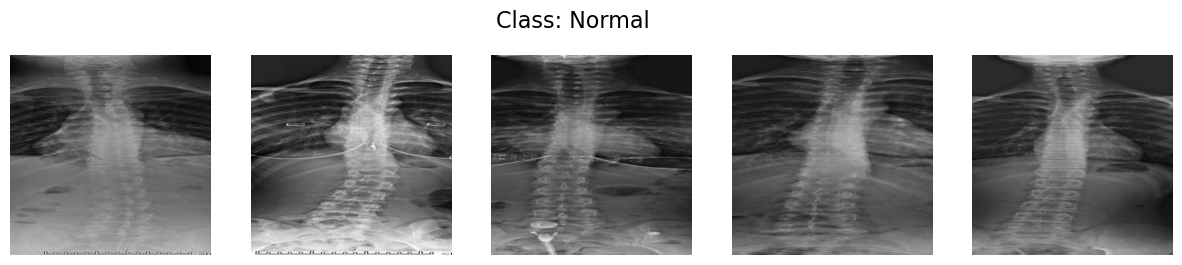

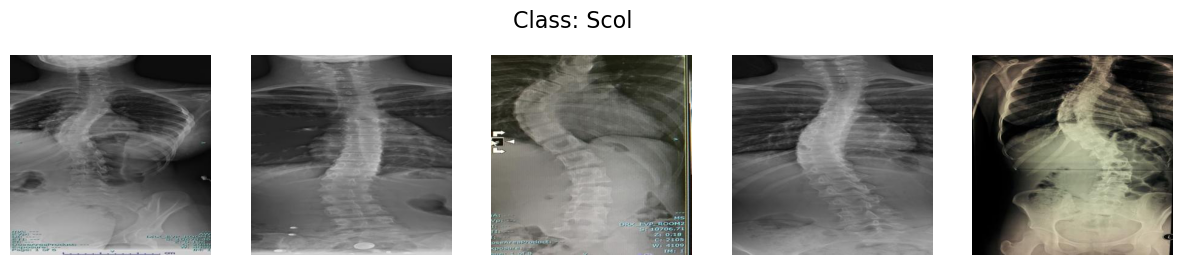

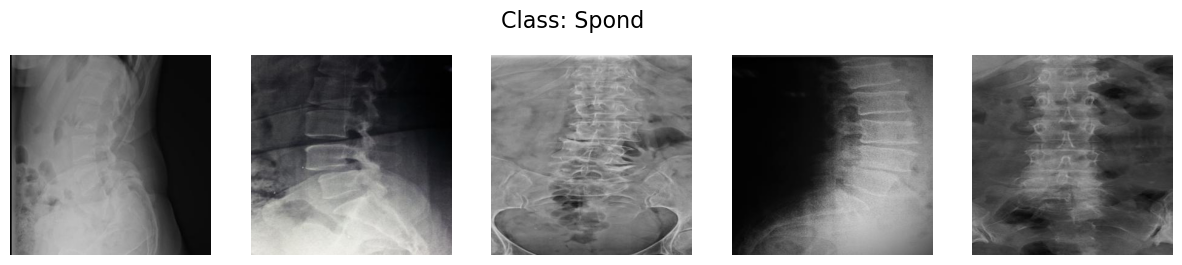

In [13]:
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    plt.show()

In [15]:
dataset_path = base_path

In [17]:
image_data = []

folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(dataset_path, folder_name)
    
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        
        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [19]:
df.head()

,image_path,label
0,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,1
1,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,1
2,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,1
3,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,1
4,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,1


In [21]:
df.tail()

,image_path,label
333,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,3
334,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,3
335,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,3
336,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,3
337,data/the-vertebrae-xray-images/xkt857dsxk-1/33...,3


In [23]:
df.shape

(338, 2)

In [25]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [27]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [33]:
df['label'].unique()

array([1, 2, 3], dtype=int64)

In [35]:
df['label'].value_counts()

label
2    188
3     79
1     71
Name: count, dtype: int64

In [37]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [38]:
df['label'] = df['label'].astype(str)

In [41]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [43]:
from imblearn.over_sampling import RandomOverSampler

X = train_df_new['image_path'].values.reshape(-1, 1)  
y = train_df_new['label'].values

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

balanced_train_df = pd.DataFrame({
    'image_path': X_resampled.flatten(),
    'label': y_resampled
})

print("Class distribution after oversampling:")
print(balanced_train_df['label'].value_counts())

Class distribution after oversampling:
label
3    150
2    150
1    150
Name: count, dtype: int64


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    balanced_train_df,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 450 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.


In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [49]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [53]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [71]:
total_train_batches = len(train_gen_new)  # Total batches in train generator
total_valid_batches = len(valid_gen_new)  # Total batches in validation generator
#steps_per_epoch=total_train_batches // 4,  # Half the training batches
#validation_steps=total_valid_batches // 4,

In [57]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    steps_per_epoch=total_train_batches // 4,  # Half the training batches
    validation_steps=total_valid_batches // 4,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.5293 - loss: 1.1241 - val_accuracy: 0.7059 - val_loss: 0.7141
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.7661 - loss: 0.5693 - val_accuracy: 0.7353 - val_loss: 0.6787
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.9156 - loss: 0.3407 - val_accuracy: 0.8235 - val_loss: 0.4565
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9411 - loss: 0.0994 - val_accuracy: 0.8824 - val_loss: 0.4715
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 1.0000 - loss: 0.0474 - val_accuracy: 0.8824 - val_loss: 0.4748


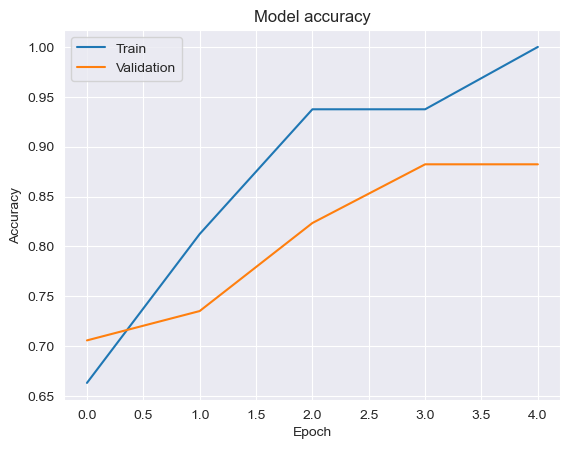

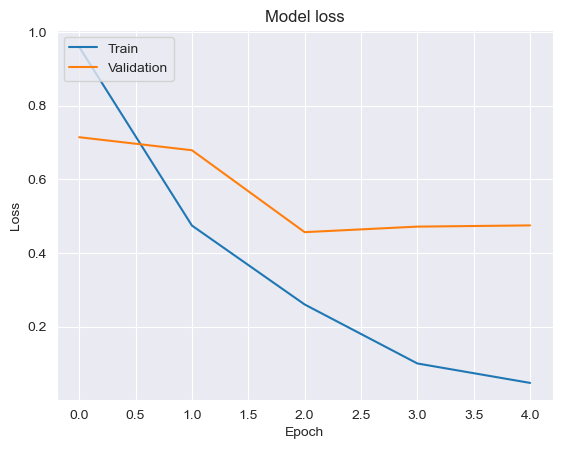

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [61]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 736ms/step


In [63]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       1.00      0.89      0.94        19
           3       0.88      0.88      0.88         8

    accuracy                           0.91        34
   macro avg       0.88      0.92      0.90        34
weighted avg       0.92      0.91      0.91        34



In [65]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

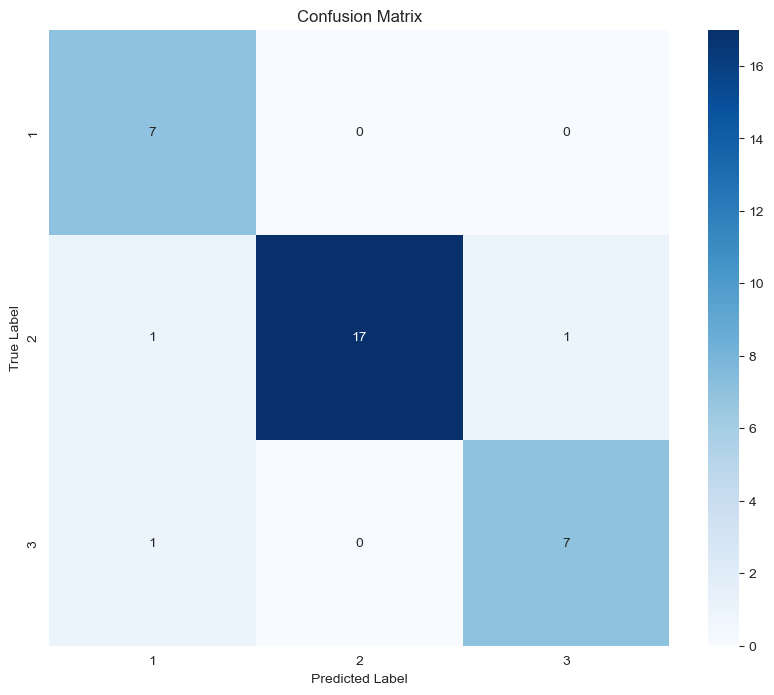

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [69]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [86]:
total_train_batches = len(train_gen_new)  # Total batches in train generator
total_valid_batches = len(valid_gen_new)  # Total batches in validation generator
steps_per_epoch=total_train_batches // 4,  # Half the training batches
validation_steps=total_valid_batches // 4,

In [73]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.8316 - loss: 0.5216 - val_accuracy: 0.8529 - val_loss: 0.3992
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9557 - loss: 0.0955 - val_accuracy: 0.5588 - val_loss: 1.5790
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9697 - loss: 0.0646 - val_accuracy: 0.7353 - val_loss: 1.6042


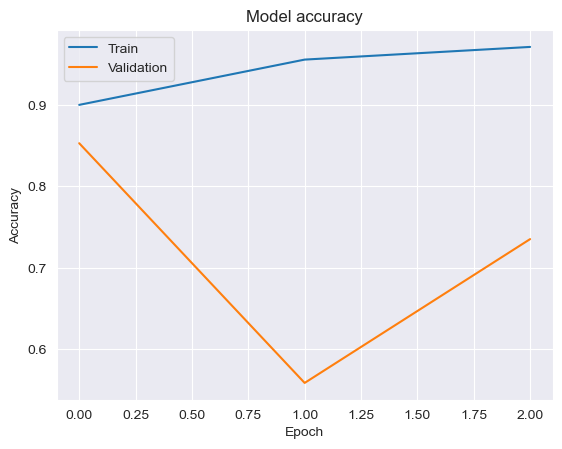

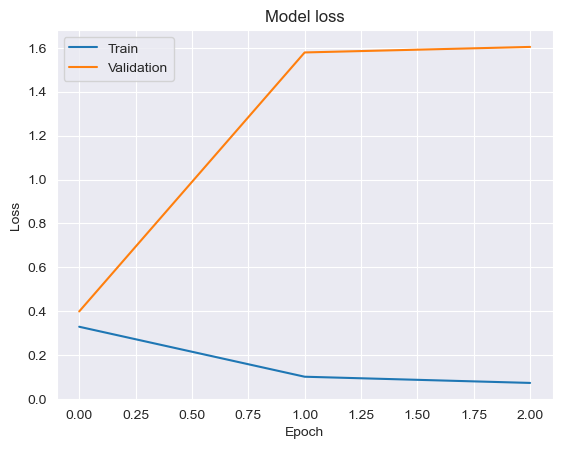

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [77]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step  


In [78]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.46      0.86      0.60         7
           2       0.94      0.79      0.86        19
           3       1.00      0.62      0.77         8

    accuracy                           0.76        34
   macro avg       0.80      0.76      0.74        34
weighted avg       0.85      0.76      0.78        34



In [81]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

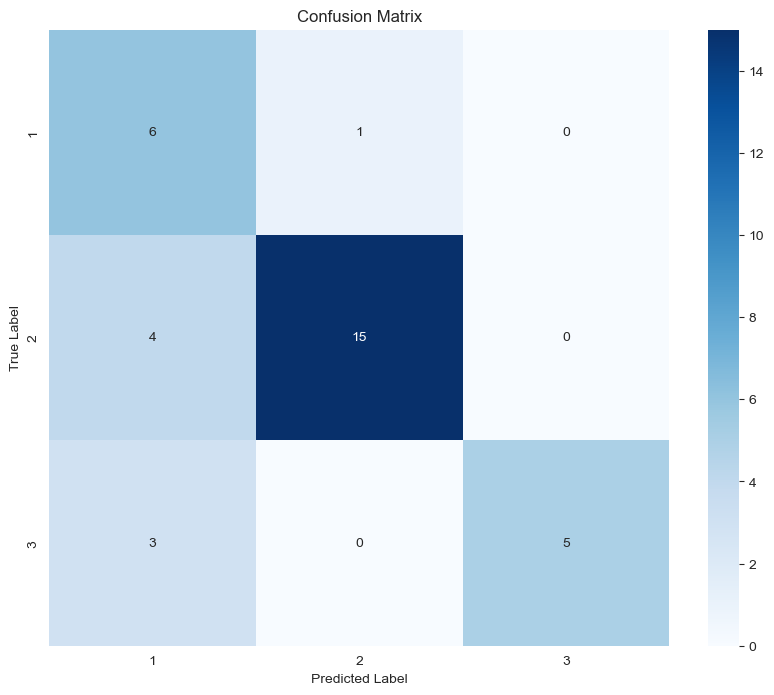

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [85]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_densenet_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

input_shape = (224, 224, 3)
densenet_model = create_densenet_model(input_shape)

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 25s 1us/step


In [89]:
total_train_batches = len(train_gen_new)  # Total batches in train generator
total_valid_batches = len(valid_gen_new)  # Total batches in validation generator
steps_per_epoch=total_train_batches // 4,  # Half the training batches
validation_steps=total_valid_batches // 4,

In [91]:
history = densenet_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 762ms/step - accuracy: 0.8597 - loss: 0.4094 - val_accuracy: 0.7059 - val_loss: 0.4695
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 698ms/step - accuracy: 0.9813 - loss: 0.0485 - val_accuracy: 0.7647 - val_loss: 0.5243
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.9800 - loss: 0.0594 - val_accuracy: 0.9706 - val_loss: 0.2149


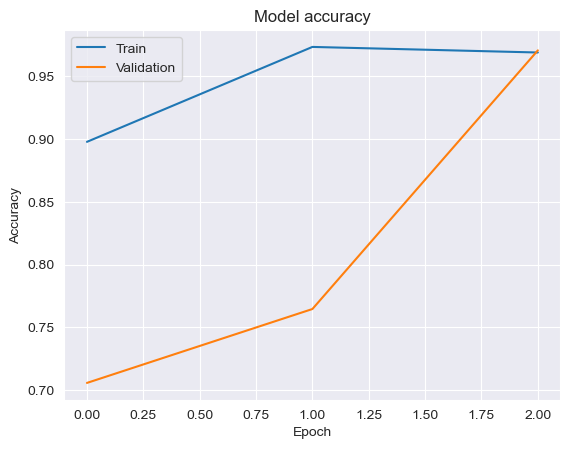

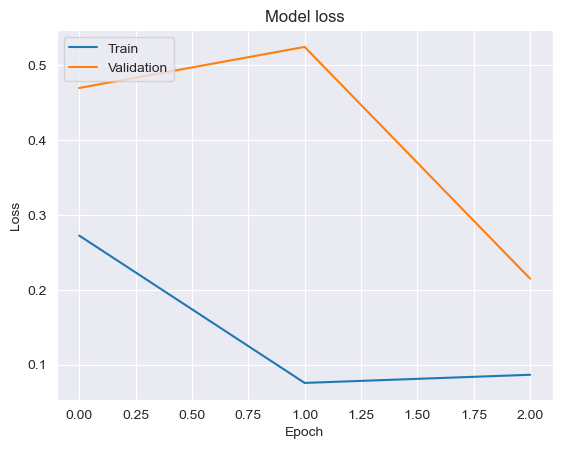

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [93]:
test_labels = test_gen_new.classes  
predictions = densenet_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002049008FB00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step  


In [94]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
           2       0.86      0.95      0.90        19
           3       1.00      0.88      0.93         8

    accuracy                           0.88        34
   macro avg       0.90      0.85      0.87        34
weighted avg       0.89      0.88      0.88        34



In [95]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

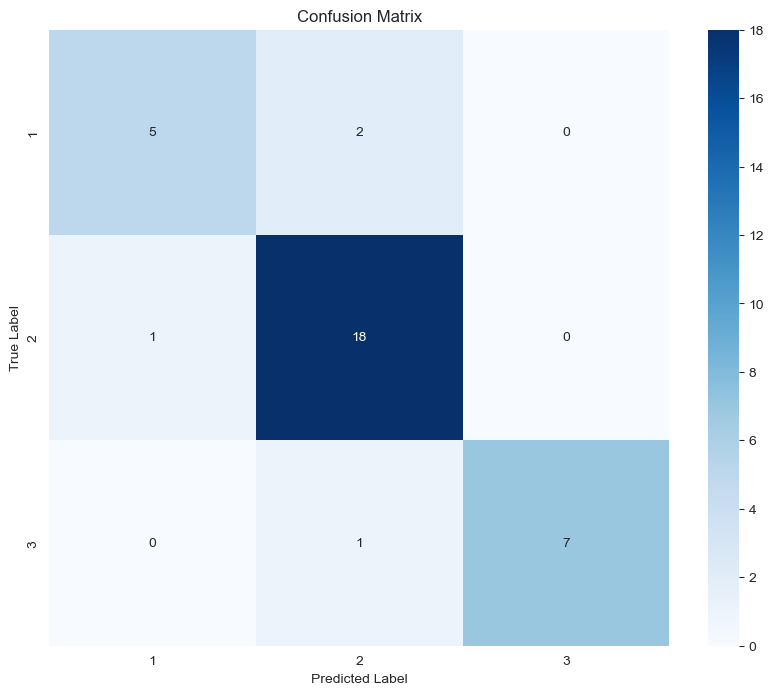

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [97]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [98]:
image_path_new = 'data/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N1, Olisthesis L5-S1, F, 34 yrs.jpg'

img_size = (224, 224)  
img = load_img(image_path_new, target_size=img_size)  
img_array = img_to_array(img)  
img_array = img_array / 255.0 
img_array = np.expand_dims(img_array, axis=0)  

In [99]:
predictions = densenet_model.predict(img_array)

predicted_class = np.argmax(predictions, axis=-1)  
print(f"Predicted Class: {predicted_class[0]}")

class_indices = train_gen_new.class_indices  
class_labels = {v: k for k, v in class_indices.items()}  
print(f"Predicted Label: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: 2
Predicted Label: 3
